# Titanic Data set-Code Alpha(Task_1)

## About Dataset
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [28]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [4]:
dt=pd.read_csv(r'C:\Users\Fast Computers\Downloads\Titanic-Dataset.csv')

In [5]:
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dt.shape

(891, 12)

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
dt.isnull().sum()/100

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            1.77
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          6.87
Embarked       0.02
dtype: float64

In [35]:
dt.dropna(axis=True)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [36]:
dt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [37]:
dt['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

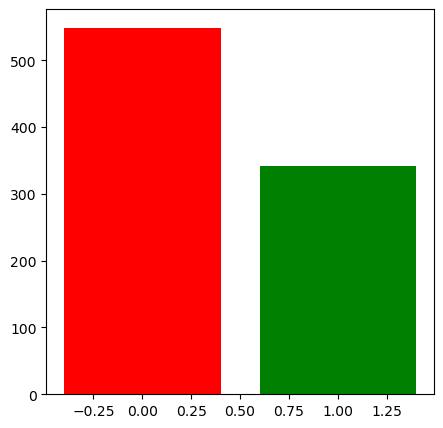

In [38]:
plt.figure(figsize=(5,5))
plt.bar(list(dt['Survived'].value_counts().keys()),list(dt['Survived'].value_counts()),color=["r","g"])
plt.show

In [39]:
dt['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

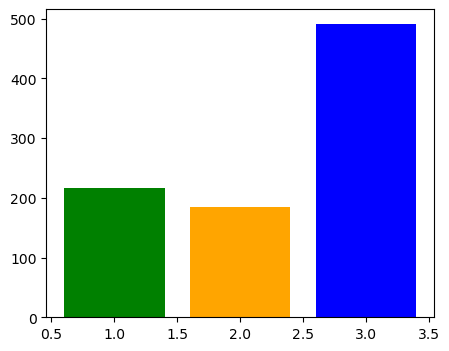

In [40]:
plt.figure(figsize=(5,4))
plt.bar(list(dt['Pclass'].value_counts().keys()),list(dt['Pclass'].value_counts()),color=["blue","green","Orange"])
plt.show

In [16]:
dt['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

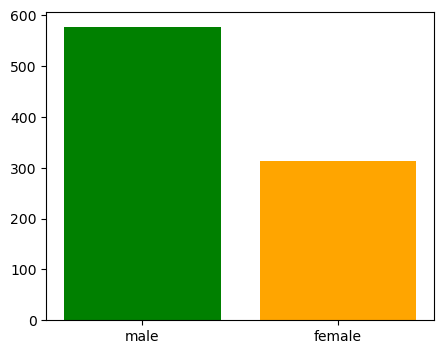

In [17]:
plt.figure(figsize=(5,4))
plt.bar(list(dt['Sex'].value_counts().keys()),list(dt['Sex'].value_counts()),color=["green","Orange"])
plt.show

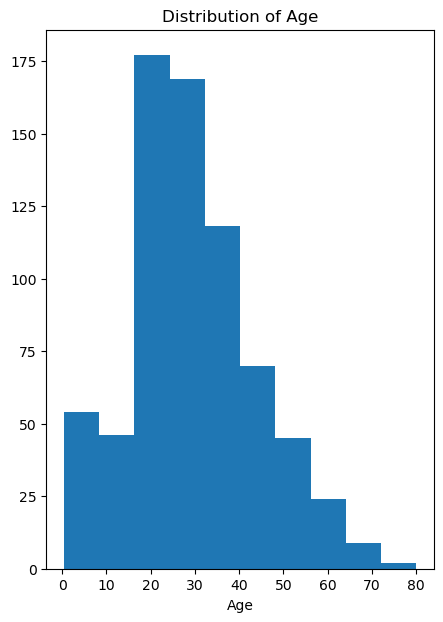

In [18]:
plt.figure(figsize=(5,7))
plt.hist(dt['Age'])
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.show()


In [19]:
sum(dt['Survived'].isnull())

0

In [41]:
sum(dt['Age'].isnull())

177

In [42]:
# Calculate the mean age
mean_age = dt['Age'].mean()

# Fill missing values with the mean age
dt['Age'].fillna(mean_age, inplace=True)


In [23]:
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Bivariate EDA
We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

There is also a marginal relationship between the fare and survial rate.

I have quantified the above relationships further in the last statsical modelling section

<Axes: xlabel='Survived', ylabel='Fare'>

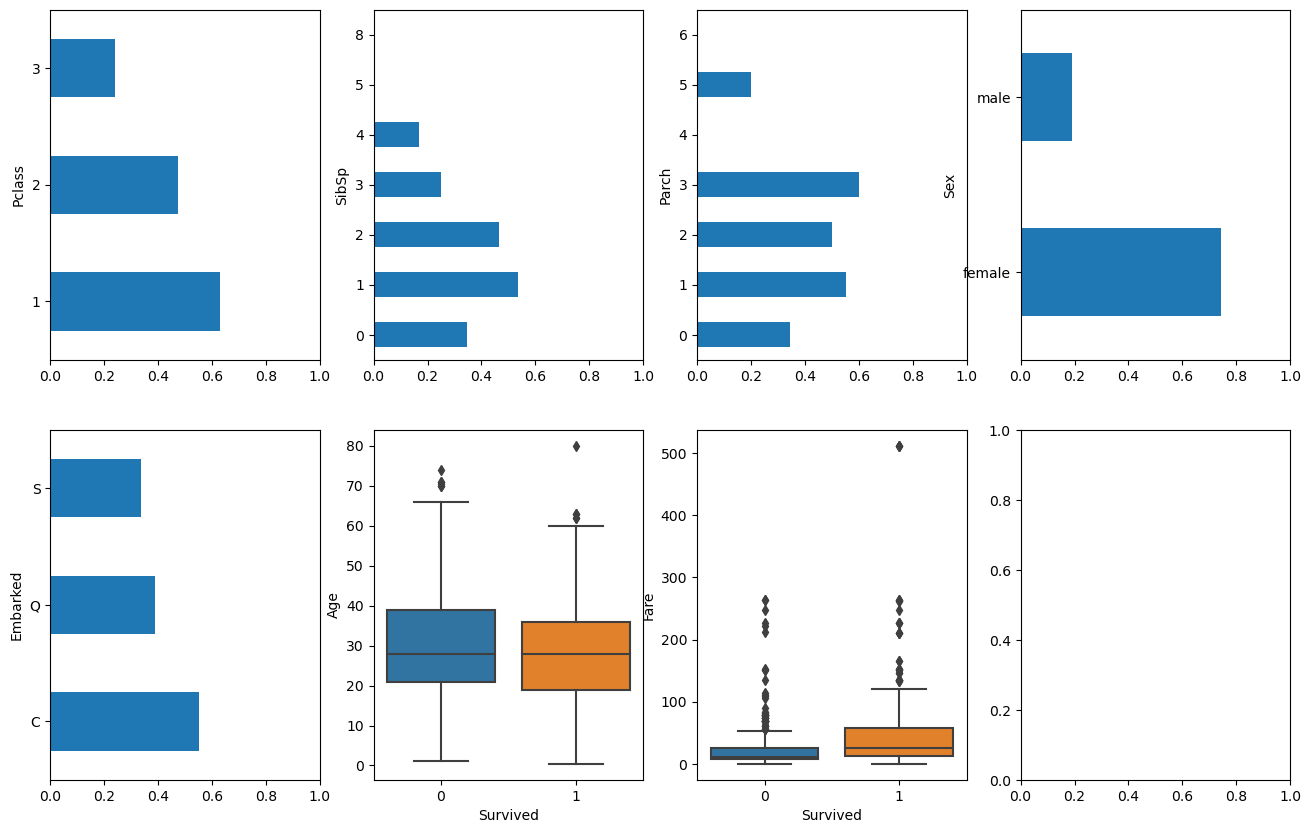

In [25]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
dt.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
dt.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
dt.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
dt.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
dt.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=dt,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=dt,ax=axesbi[1,2])

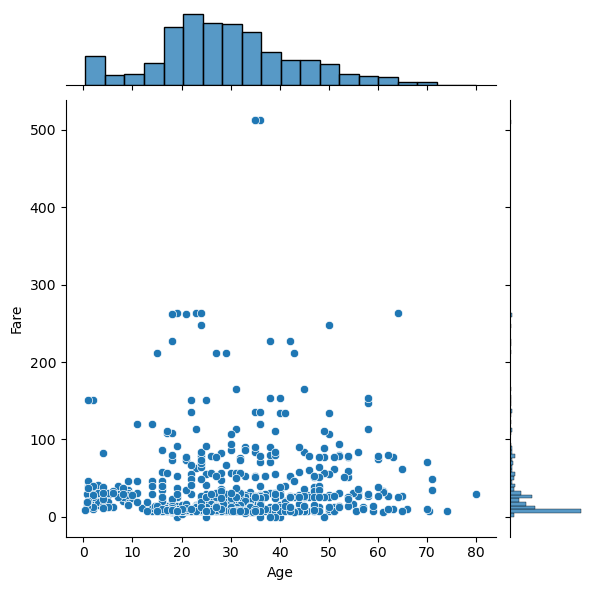

In [26]:
sns.jointplot(x="Age", y="Fare", data=dt);

#### Multivariate EDA
Construct a Coorelation matrix of the int64 and float64 feature types
There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

There is a negative coorelation between Fare and Pclass, Age and Plcass

C:\Users\Fast Computers\AppData\Local\Temp\ipykernel_10808\319012480.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dt.corr()


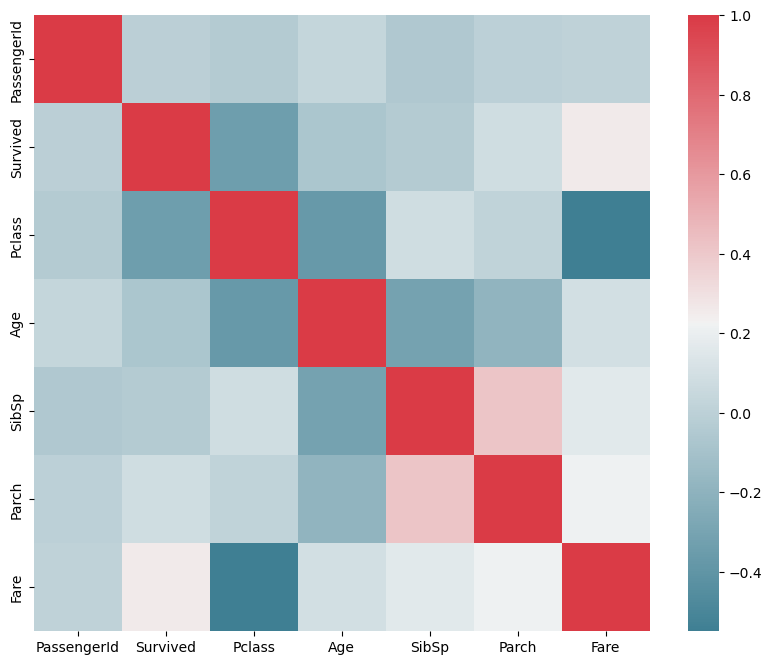

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `dt` is your DataFrame containing the Titanic dataset
f, ax = plt.subplots(figsize=(10, 8))
corr = dt.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=bool),  # Modify this line
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


In [49]:
from sklearn.model_selection import train_test_split# Assuming 'dt' is your DataFrame
# Convert 'Sex' column into one-hot encoded format
X_encoded = pd.get_dummies(dt[['Sex']], drop_first=True)

# Concatenate the encoded 'Sex' column with the other features
X = pd.concat([X_encoded, dt[['Age', 'Pclass']]], axis=1)

# Assuming 'Survived' is your target variable
y = dt['Survived']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [51]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
# Train models
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
# Make predictions
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

# Evaluate model performance
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1-score': f1_score,
    'AUC-ROC': roc_auc_score
}

for name, metric in metrics.items():
    score1 = metric(y_test, y_pred1)
    score2 = metric(y_test, y_pred2)
    print(f'{name}:')
    print(f'Model 1: {score1:.4f}')
    print(f'Model 2: {score2:.4f}')
    print()

Accuracy:
Model 1: 0.8101
Model 2: 0.7877

Precision:
Model 1: 0.7941
Model 2: 0.7647

Recall:
Model 1: 0.7297
Model 2: 0.7027

F1-score:
Model 1: 0.7606
Model 2: 0.7324

AUC-ROC:
Model 1: 0.7982
Model 2: 0.7752



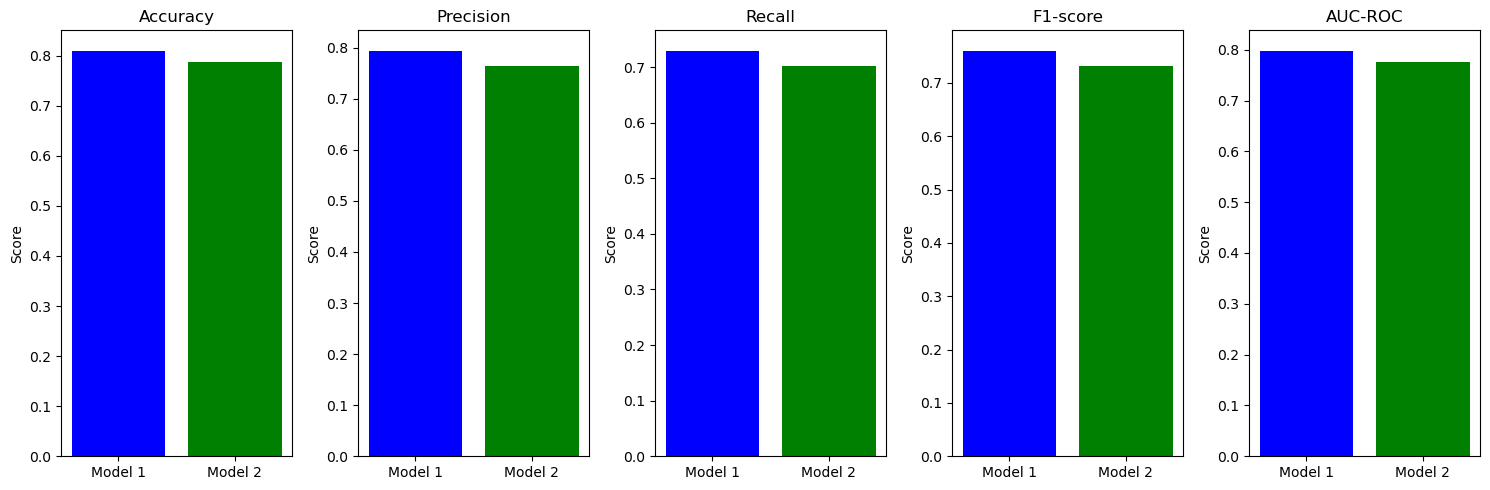

In [52]:
# Define the evaluation metrics and their scores for both models
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC-ROC']
model1_scores = [0.8101, 0.7941, 0.7297, 0.7606, 0.7982]
model2_scores = [0.7877, 0.7647, 0.7027, 0.7324, 0.7752]

# Plotting the metrics
fig, axes = plt.subplots(nrows=1, ncols=len(metrics_names), figsize=(15, 5))

for i, metric in enumerate(metrics_names):
    ax = axes[i]
    ax.bar(['Model 1', 'Model 2'], [model1_scores[i], model2_scores[i]], color=['blue', 'green'])
    ax.set_title(metric)
    ax.set_ylabel('Score')

plt.tight_layout()
plt.show()


###### By ploting the results of models ,we can evaluate the performance of LOgistic regression is better then Random forest classifier. and in order to improve our accuacy score ,i can apply hyperparametr tuning .